In [61]:
# Import Libriaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [62]:
# load csv file
Train = pd.read_csv("loan train.csv")
Test = pd.read_csv("loan test.csv")

In [63]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
Train.shape

(614, 13)

In [65]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
Test.shape

(367, 12)

In [67]:
# Join both the train and test dataset
Train['source']='Train'
Test['source']='Test'

dataset = pd.concat([Train,Test], ignore_index = True)
print("Train dataset shape:",Train.shape)
print("Test dataset shape:",Test.shape)
print("Concatenated dataset shape:",dataset.shape)


Train dataset shape: (614, 14)
Test dataset shape: (367, 13)
Concatenated dataset shape: (981, 14)


# Data Inspection

In [68]:
# check first 5 row
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Train


In [69]:
# check last 5 row
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,Test
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,Test
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,Test
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,Test
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,Test


In [70]:
# check number or rows and columns
dataset.shape

(981, 14)

In [71]:
# data Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [72]:
# check missing value
dataset.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

# Replace missing value

**1) Missing values in Integer and Float dtype columns are replaced by their median**

**2) Missing values in Object dtype columns are replaced by their mode**

**3) The missing values in 'Loan_Status' are the Values that need to be predicted by our model. Hence, we need not impute the NaN values in Loan_Status column.**

In [73]:
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace=True)
dataset["Married"].fillna(dataset["Married"].mode()[0],inplace=True)
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)
dataset["Self_Employed"].fillna(dataset["Self_Employed"].mode()[0],inplace=True)
dataset["LoanAmount"].fillna(dataset["LoanAmount"].median(),inplace=True)
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].median(),inplace=True)
dataset["Credit_History"].fillna(dataset["Credit_History"].median(),inplace=True)

In [74]:
dataset.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

# Spliting the train and test set again after replacing all missing values

**Divide into test and train**

In [75]:
Train = dataset.loc[dataset['source']=="Train"]
Test = dataset.loc[dataset['source']=="Test"]

**Drop unnecessary columns**

In [76]:
Test.drop(['source'],axis=1,inplace=True)
Train.drop(['source'],axis=1,inplace=True)

C:\Program Files\KMSpico\temp\ipykernel_26204\3610510738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(['source'],axis=1,inplace=True)
C:\Program Files\KMSpico\temp\ipykernel_26204\3610510738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop(['source'],axis=1,inplace=True)


In [77]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
Train.shape

(614, 13)

In [79]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,NaN
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [80]:
Test.shape

(367, 13)

# Data Visualization on Train data set

**plot for Loan Status**

Text(0, 0.5, 'Count')

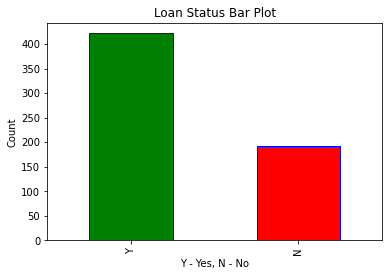

In [81]:
Train["Loan_Status"].value_counts().plot.bar(color=["Green", "Red"], edgecolor="Blue")
plt.title("Loan Status Bar Plot")
plt.xlabel("Y - Yes, N - No")
plt.ylabel("Count")

**Plot for categorical data like Gender, Married, Self Employed and Property Area**

<AxesSubplot:title={'center':'Property_Area'}>

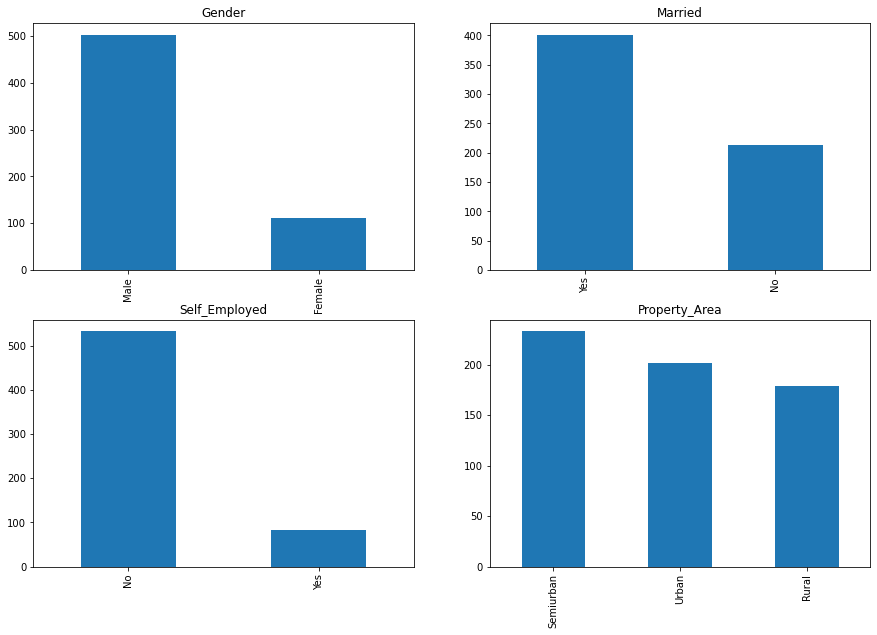

In [82]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
Train["Gender"].value_counts().plot.bar(title="Gender")
plt.subplot(2,2,2)
Train["Married"].value_counts().plot.bar(title="Married")
plt.subplot(2,2,3)
Train["Self_Employed"].value_counts().plot.bar(title="Self_Employed")
plt.subplot(2,2,4)
Train["Property_Area"].value_counts().plot.bar(title="Property_Area")

**Plot for Categorical Independent Variable against Target Variable**

<AxesSubplot:xlabel='Property_Area'>

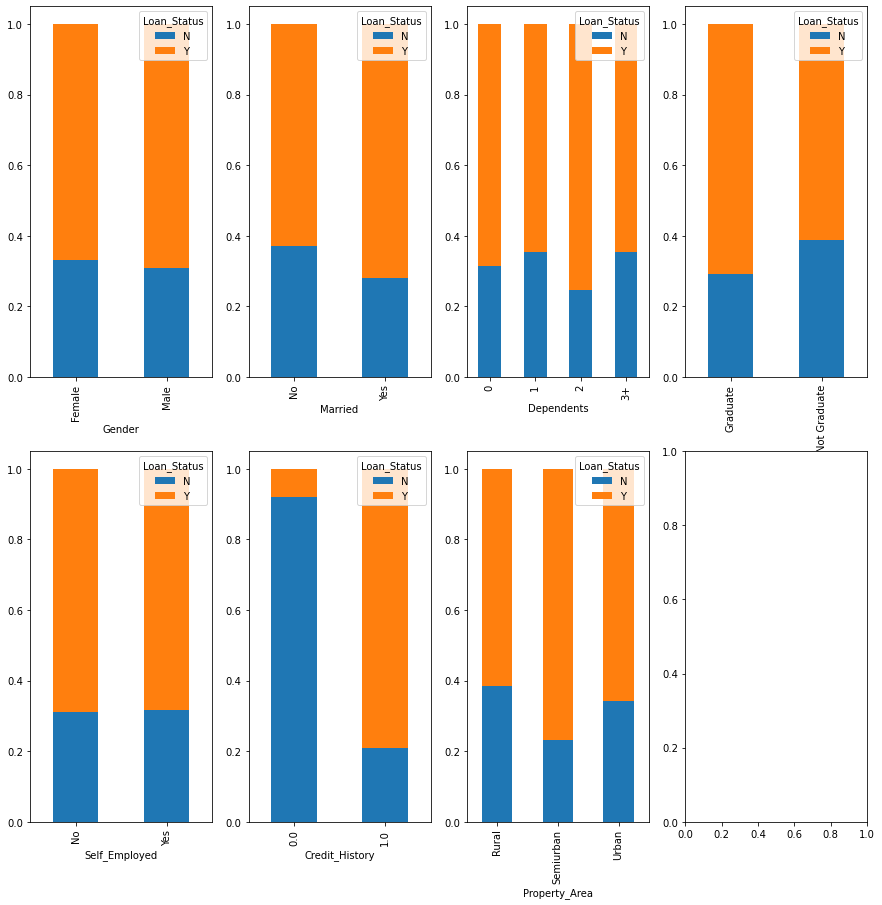

In [83]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(Train['Gender'],Train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])
cmap ="YlGnBu"
Married = pd.crosstab(Train['Married'],Train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(Train['Dependents'],Train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(Train['Education'],Train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(Train['Self_Employed'],Train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(Train['Credit_History'],Train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(Train['Property_Area'],Train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

**Convert categorical data to numerical**

In [164]:
Xtrain = Train.drop(["Loan_Status", "Loan_ID"], axis=1)
Xtrain = pd.get_dummies(Xtrain, drop_first=True)
Xtrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


# Select Target

In [165]:
y = Train.Loan_Status

In [166]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# Select Features

In [168]:
X = Xtrain
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


# Train Test Split

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

**Initialize logistic regression**

In [170]:
LR_model = LogisticRegression(max_iter=1000, random_state=0)

In [171]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [172]:
LR_preds = LR_model.predict(X_test)

In [173]:
LR = accuracy_score(LR_preds,y_test)*100
LR

83.78378378378379

In [174]:
print(classification_report(LR_preds,y_test))

              precision    recall  f1-score   support

           N       0.47      0.89      0.62        27
           Y       0.98      0.83      0.90       158

    accuracy                           0.84       185
   macro avg       0.72      0.86      0.76       185
weighted avg       0.90      0.84      0.86       185



In [175]:
print(confusion_matrix(LR_preds,y_test))

[[ 24   3]
 [ 27 131]]


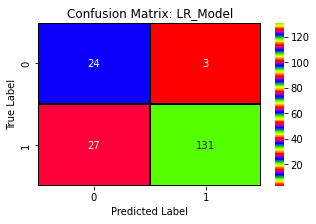

In [176]:
CM = confusion_matrix(LR_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='prism',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize DecisionTreeClassifier**

In [177]:
DC_model = DecisionTreeClassifier()

In [178]:
DC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
DC_preds = DC_model.predict(X_test)

In [180]:
DC = accuracy_score(DC_preds, y_test)*100
DC

65.4054054054054

In [181]:
print(classification_report(DC_preds, y_test))

              precision    recall  f1-score   support

           N       0.41      0.38      0.40        55
           Y       0.75      0.77      0.76       130

    accuracy                           0.65       185
   macro avg       0.58      0.58      0.58       185
weighted avg       0.65      0.65      0.65       185



In [182]:
print(confusion_matrix(DC_preds, y_test))

[[ 21  34]
 [ 30 100]]


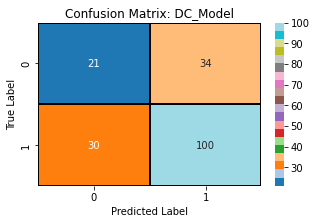

In [183]:
CM = confusion_matrix(DC_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='tab20',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize KNeighborsClassifier**

In [184]:
KN_model = KNeighborsClassifier()

In [185]:
KN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [186]:
KN_preds = KN_model.predict(X_test)

In [187]:
KN = accuracy_score(KN_preds, y_test)*100
KN

62.70270270270271

In [188]:
print(classification_report(KN_preds, y_test))

              precision    recall  f1-score   support

           N       0.24      0.29      0.26        42
           Y       0.78      0.73      0.75       143

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.65      0.63      0.64       185



In [189]:
print(confusion_matrix(KN_preds, y_test))

[[ 12  30]
 [ 39 104]]


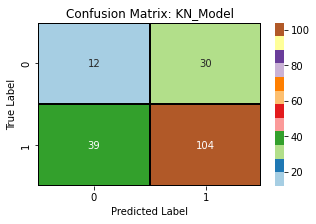

In [190]:
CM = confusion_matrix(KN_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='Paired',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KN_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Initialize RandomForestClassifier**

In [191]:
RF_model = RandomForestClassifier()

In [192]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [193]:
RF_preds = RF_model.predict(X_test)

In [194]:
RF = accuracy_score(RF_preds, y_test)*100
RF

79.45945945945945

In [195]:
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           N       0.43      0.71      0.54        31
           Y       0.93      0.81      0.87       154

    accuracy                           0.79       185
   macro avg       0.68      0.76      0.70       185
weighted avg       0.85      0.79      0.81       185



In [196]:
print(confusion_matrix(RF_preds, y_test))

[[ 22   9]
 [ 29 125]]


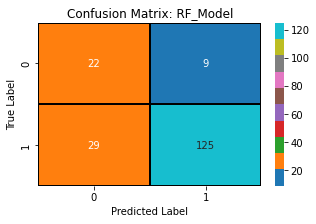

In [197]:
CM = confusion_matrix(RF_preds, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='tab10',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [209]:
print("1): Logistic Regression        :", LR)
print("2): Decision Tree Classifier   :", DC)
print("3): KNeighbors Classifier      :", KN)
print("4): Random Forest Classifier   :", RF)
# print("5): Support Vector Classifier  :", SVC)

1): Logistic Regression        : 83.78378378378379
2): Decision Tree Classifier   : 65.4054054054054
3): KNeighbors Classifier      : 62.70270270270271
4): Random Forest Classifier   : 79.45945945945945


**The best model that fit for this data set is Logistic Regression because it has the highest recall with best accuracy of 83%**

# Predict the value of loan_status of the given test data set

In [210]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,NaN
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [211]:
Xtest = Test.drop(["Loan_Status", "Loan_ID"], axis=1)

In [212]:
Xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
615,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
616,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
617,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
618,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


In [213]:
Xtest = pd.get_dummies(Xtest, drop_first=True)
Xtest.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
614,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
615,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
616,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
617,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
618,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [214]:
Test_pred =  LR_model.predict(Xtest)

In [215]:
Test["Loan_Status"] = Test_pred

C:\Program Files\KMSpico\temp\ipykernel_26204\2803686200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test["Loan_Status"] = Test_pred


In [216]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [217]:
submission = Test[["Loan_ID","Loan_Status"]].copy()

In [218]:
submission.to_csv("TestLR.csv")